In [1]:
# import the standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data using pandas read functions
data=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# Drop the person id columns
data=data.drop('Person ID',axis=1)

In [4]:
# Checking the data shape
print(f"The data set contains {data.shape[1]} columns and are {data.shape[0]}")

The data set contains 12 columns and are 374


In [5]:
# All the columns information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [6]:
# Checking the Null values
data.isna().sum()/len(data.shape)*100

Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

In [7]:
data.describe().style.background_gradient(cmap='nipy_spectral')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


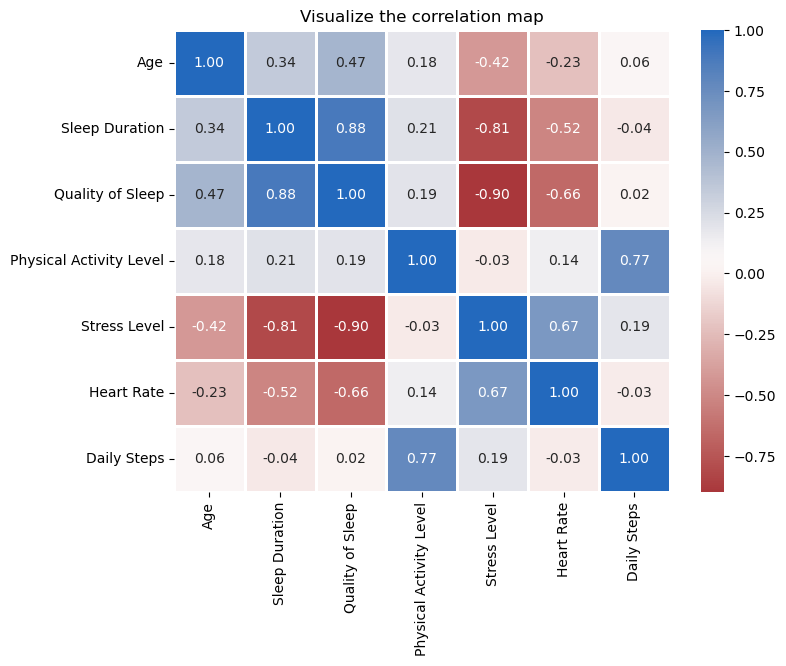

In [8]:
# Visualize the Correlation map
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='vlag_r',annot=True,fmt='.2f',linewidths=1)
plt.title("Visualize the correlation map")
plt.show()

# Explore data Analysis

<Axes: title={'center': 'Sleep Disorder percentage in the data'}, ylabel='Sleep Disorder'>

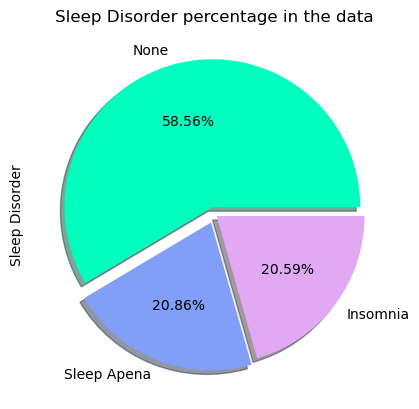

In [9]:
# Find the sleep disorder percentage
data['Sleep Disorder'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Sleep Disorder percentage in the data",explode=[0.05,0.06,0.02],
labels=['None','Sleep Apena','Insomnia'],
colors=['#00FFBF','#819FF7','#E2A9F3'],
autopct='%1.2f%%',
shadow=True)

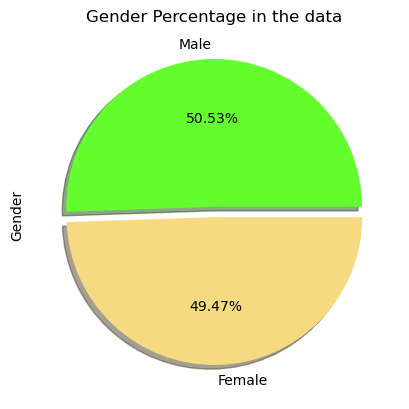

In [10]:
# Find the Gender Percentage using data
data['Gender'].value_counts(normalize=True).sort_values(ascending=False)\
.plot(kind='pie',title="Gender Percentage in the data",explode=[0.05,0.02],
     labels=['Male','Female'],
     colors=['#64FE2E','#F5DA81'],
     autopct='%1.2f%%',
     shadow=True)
plt.show()

# Observations:



From the above two pie charts, we can observe several pieces of information.
Firstly, the highest percentage in the sleep disorder pie chart is "None" indicating that a significant portion of the data does not have reported sleep disorders. The second-highest sleep disorder category is "Sleep Apnea".
In the second pie chart depicting gender percentages, the male percentage in higher compared to the female percentage.

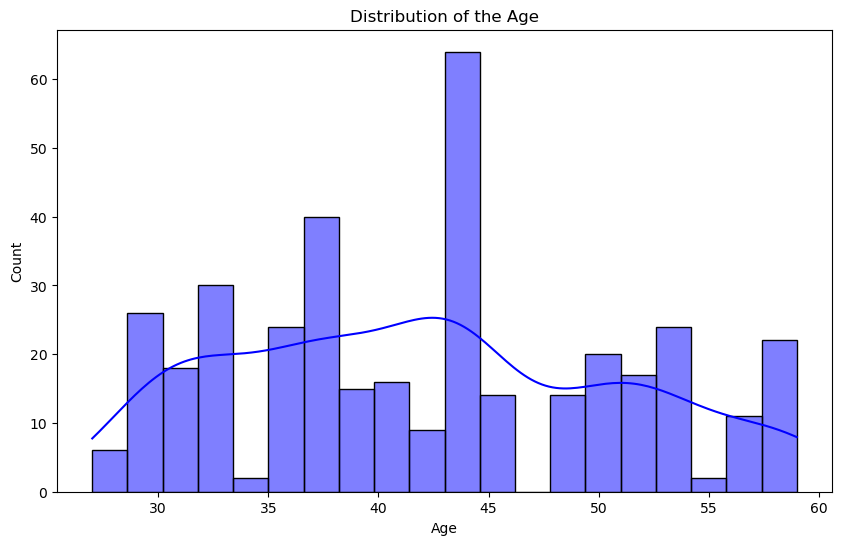

In [11]:
# Distribution of the age columns
plt.figure(figsize=(10,6))
sns.histplot(data,x='Age',stat='count',bins=20,kde=True,color='b')
plt.title("Distribution of the Age")
plt.show()

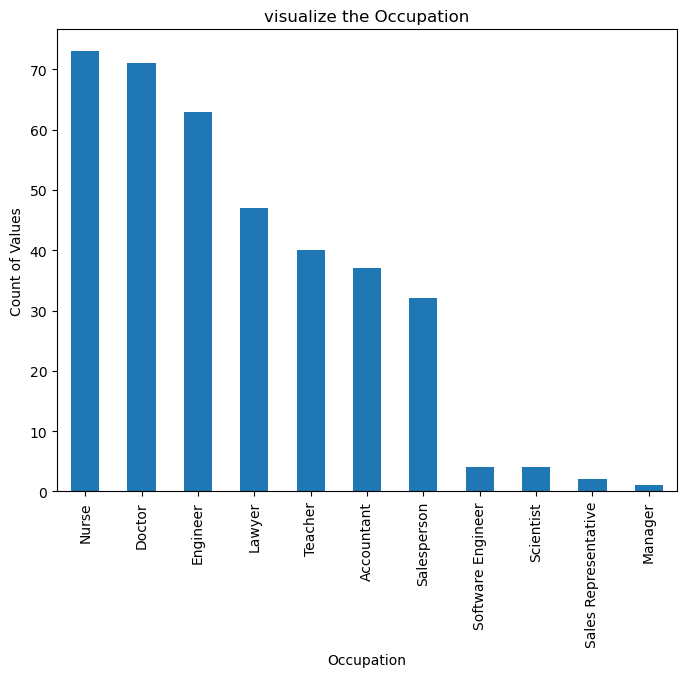

In [12]:
# Count of the occupation in the data using the bar plot
data['Occupation'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title='visualize the Occupation',figsize=(8,6)),
plt.xlabel('Occupation')
plt.ylabel('Count of Values')
plt.show()

# Observation:

From the above two charts, one being a histogram and the other a bar chart, we can observe the following patterns:
In the age histogram, there is a noticeable repetition of the age 43, indicating that a significant number of individuals in the dataset fall within this age range.
In the bar chart, we can determine that the most demanding job based on the dataset is "Nurse," while the least demanding job is "manager."

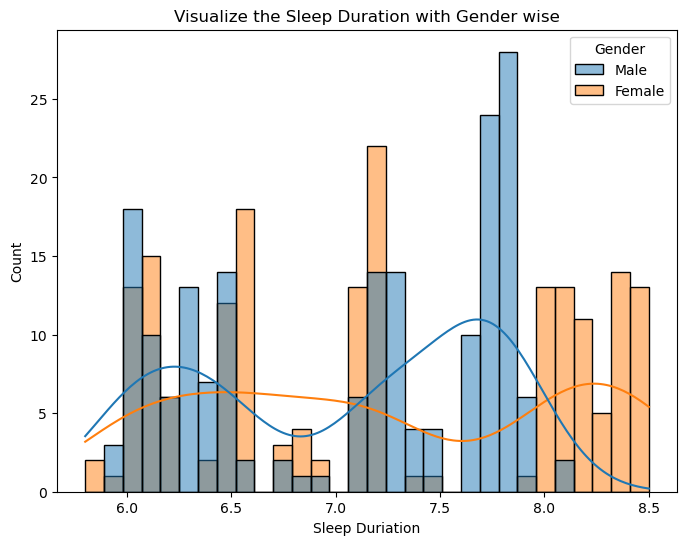

In [13]:
# Visualize the Sleep Duration with Gender wise
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Sleep Duration',bins=30,kde=True,hue='Gender')
plt.title("Visualize the Sleep Duration with Gender wise")
plt.xlabel("Sleep Duriation")
plt.ylabel("Count")
plt.show()

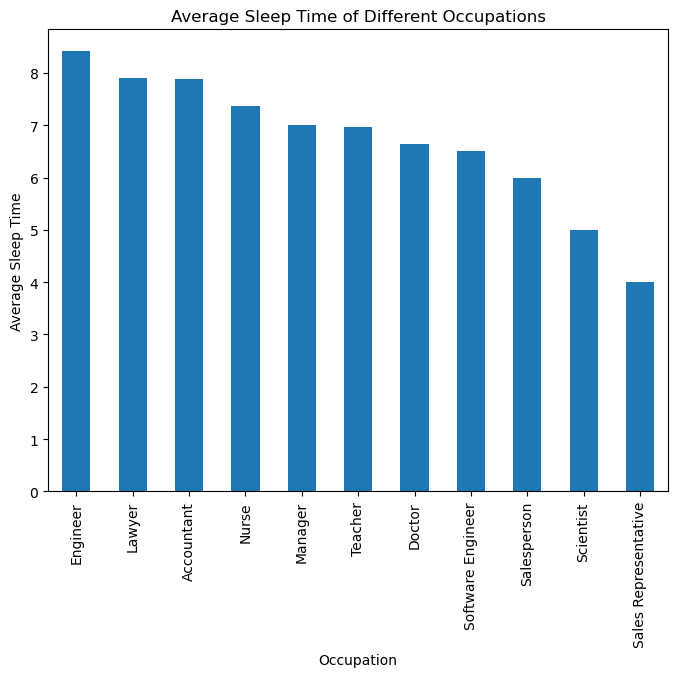

In [14]:
occupation_sleep_mean = data.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
occupation_sleep_mean.plot(kind='bar')
plt.title('Average Sleep Time of Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Time')
plt.show()

# Observation

From the two charts, we can analyze the average sleep duration based on gender and the quality of sleep based on different occupations.
According to the histogram chart,the average sleep duration for males is approximately 7.7 hours, while for females, it is around 8.5 hours.
In the bar, it is evident that the occupation "Engineer" has the highest sleep quality among the different roles, while the occupation "Sales Representative" has the lowest sleep quality.